In [24]:
import numpy as np
import pandas as pd
import json
from psaw import PushshiftAPI
from functions import time_stamp
import re
import redditcleaner
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [45]:
pd.set_option("max_colwidth", 800)

In [25]:
api = PushshiftAPI()

In [39]:
subreddit = "technology"

start_date = '01/01/2021'
end_date = '31/12/2021'

limit = 1000


s = time_stamp(start_date)
e = time_stamp(end_date)

submissions = api.search_submissions(subreddit=subreddit, limit=limit, after=s, before=e, sort="dsc",sort_type="score")
df = pd.DataFrame([row.d_ for row in submissions])

In [40]:
mask = ['author', 'title', 'score', 'subreddit', 'subreddit_subscribers', 'all_awardings', 'is_crosspostable', 'is_original_content', 'num_comments', 'num_crossposts', 'subreddit_subscribers']
df[mask]

,author,title,score,subreddit,subreddit_subscribers,all_awardings,is_crosspostable,is_original_content,num_comments,num_crossposts,subreddit_subscribers
0,x101y,"9 Decentralized, Open Source Alternative Socia...",0,technology,10066249,[],True,False,5,0,10066249
1,EnterpriseNews_Elf,Some lending apps thrive on India's Google Pla...,0,technology,10068208,[],True,False,0,0,10068208
2,Perfect_Gas,He Created the Web. Now He’s Out to Remake the...,0,technology,10068346,[],True,False,2,0,10068346
3,TomCruise77,Online Robotic Engineering,0,technology,10068653,[],True,False,1,1,10068653
4,ElonMuch,Parler and the Problem of Escaping Internet Ce...,0,technology,10068399,[],True,False,1,0,10068399
...,...,...,...,...,...,...,...,...,...,...,...
992,Yankees607257,Is Facebook/Instagram the best thing for socie...,1,technology,10916827,[],False,False,2,0,10916827
993,lilmissfithi,New Video App- A Trustworthy source for LIVE V...,1,technology,10916863,[],False,False,2,0,10916863
994,Zolivia,"FB, WhatsApp, Instagram, messenger app offline.",1,technology,10915746,[],True,False,8,0,10915746
995,darkstarrising,"Facebook, Instagram And WhatsApp Down: Social ...",1,technology,10915791,[],True,False,2,0,10915791


In [28]:
def clean_text(text_arr):
    text_arr = text_arr.map(redditcleaner.clean)
    text_arr = text_arr.apply(lambda x: re.sub('\W+', ' ', x))
    return text_arr

In [29]:
comments = api.search_comments(subreddit='politics', limit=400, after="1604436187", before="1607028187", sort="asc",sort_type="score")

In [30]:
df['title'] = df['title'].apply(lambda x: re.sub('\W+', ' ', x))
df['title']

0      9 Decentralized Open Source Alternative Social...
1      Some lending apps thrive on India s Google Pla...
2      He Created the Web Now He s Out to Remake the ...
3                             Online Robotic Engineering
4      Parler and the Problem of Escaping Internet Ce...
                             ...                        
992    Is Facebook Instagram the best thing for socie...
993    New Video App A Trustworthy source for LIVE Vi...
994         FB WhatsApp Instagram messenger app offline 
995    Facebook Instagram And WhatsApp Down Social Me...
996    Tesla is building Model Y bodies with single f...
Name: title, Length: 997, dtype: object

In [302]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV

x = df['title']

process_steps = [
    ('tfidf', TfidfVectorizer())
    ,("to_array", FunctionTransformer(lambda x: x.todense(), accept_sparse=True))
    ,('reduce_dim', PCA(2))
    ,('kmean', KMeans(n_clusters = 20, random_state=0))
]
# process_steps = [
#     ('tfidf', TfidfVectorizer())
#     ,("to_array", FunctionTransformer(lambda x: x.todense(), accept_sparse=True))
#     ,('reduce_dim', PCA())
#     ,('kmean', KMeans(random_state=0))
# ]

# parameter = {
#   'reduce_dim__n_components': [*range(2, 6, 1)],
#   'kmean__n_clusters': [*range(2, 20, 2)]
#   }

# grid_pipeline = GridSearchCV(process_steps,parameter)
# grid_pipeline.fit(x)

process_pipe = Pipeline(process_steps)
process = process_pipe.fit(x)


/Users/jameskidd/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [31]:
vectorizer = CountVectorizer(max_features=1000)

x = df['title']

X = vectorizer.fit_transform(x)
wordLabels = vectorizer.get_feature_names_out()

pd.DataFrame(data=X.toarray(), columns=wordLabels)

,000,10,11,12,13,14,15,17,18,19,...,year,years,yesterday,you,young,your,youtube,zero,zoom,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
x

0      9 Decentralized Open Source Alternative Social...
1      Some lending apps thrive on India s Google Pla...
2      He Created the Web Now He s Out to Remake the ...
3                             Online Robotic Engineering
4      Parler and the Problem of Escaping Internet Ce...
                             ...                        
992    Is Facebook Instagram the best thing for socie...
993    New Video App A Trustworthy source for LIVE Vi...
994         FB WhatsApp Instagram messenger app offline 
995    Facebook Instagram And WhatsApp Down Social Me...
996    Tesla is building Model Y bodies with single f...
Name: title, Length: 997, dtype: object

In [259]:
tf = TfidfVectorizer()
tf_X = tf.fit_transform(x).toarray()


In [263]:
pca_model = PCA(2)
pca_train = pca_model.fit_transform(tf_X)
pca_train

array([[-0.02810393, -0.02602221],
       [-0.04294571, -0.03504167],
       [-0.06701489,  0.22475251],
       ...,
       [ 0.23846315, -0.03379249],
       [ 0.32079955,  0.02943276],
       [-0.00837709, -0.01621565]])

In [46]:

pca = pd.DataFrame(pca_train, columns=["pc1", "pc2"])
pca['title'] = df['title']
pca[(pca['pc1'] < 0) & (pca['pc2'] < 0)]

,pc1,pc2,title
0,-0.028178,-0.026655,"9 Decentralized, Open Source Alternative Social Media Platforms"
1,-0.041756,-0.032699,Some lending apps thrive on India's Google Play despite policy violations
3,-0.020127,-0.036422,Online Robotic Engineering
6,-0.029271,-0.044346,"Pfizer's Covid-19 vaccine appears to work against mutation in new coronavirus strains, study finds"
7,-0.027820,-0.038681,Twitter permanently suspends president as impeachment articles drawn up – follow live
...,...,...,...
983,-0.022982,-0.037437,TvUnlimited is way better than any other IPTV I’ve had.
984,-0.019728,-0.028722,What’s one thing/ product beside internet that we use daily / every second?
986,-0.028736,-0.035025,Carretos em santos
993,-0.005215,-0.024271,"New Video App- A Trustworthy source for LIVE Videos - People can request, stream, and share experiences on demand."


In [47]:

pca = pd.DataFrame(pca_train, columns=["pc1", "pc2"])
pca['title'] = df['title']
pca[(pca['pc1'] > 0.4) & (pca['pc2'] > -0.1)]

,pc1,pc2,title
155,0.594644,0.254227,The Great Facebook Outage of 2021: Why WhatsApp and Instagram were down for six hours yesterday
316,0.594644,0.254227,The Great Facebook Outage of 2021: Why WhatsApp and Instagram were down for six hours yesterday
504,0.594644,0.254227,The Great Facebook Outage of 2021: Why WhatsApp and Instagram were down for six hours yesterday
549,0.480570,-0.025015,Facebook reveals what caused six-hour outage hitting Whatsapp and Instagram services
618,0.553144,-0.025977,"How to delete Instagram, WhatsApp, and Facebook"
754,0.594644,0.254227,The Great Facebook Outage of 2021: Why WhatsApp and Instagram were down for six hours yesterday
798,0.480570,-0.025015,Facebook reveals what caused six-hour outage hitting Whatsapp and Instagram services
846,0.553144,-0.025977,"How to delete Instagram, WhatsApp, and Facebook"
898,0.440059,-0.018387,What happened with facebook and whatsapp ?
913,0.471762,-0.085473,"What Happened to Facebook, Instagram, &amp; WhatsApp?"


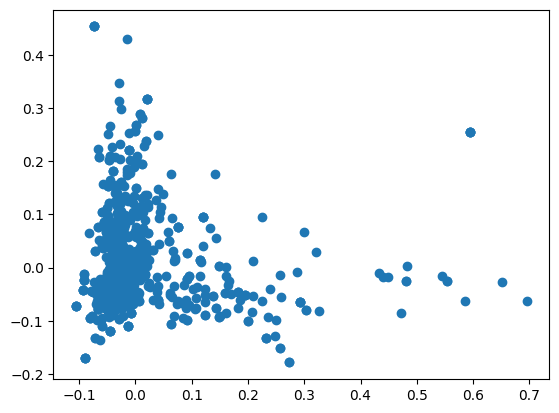

In [36]:
plt.scatter(pca_train[:,0], pca_train[:,1])
plt.show()

In [247]:
kmeans = KMeans(n_clusters = 20, random_state=0)

kmeans = kmeans.fit(pca_train)
l = kmeans.labels_

r = np.zeros((len(np.unique(l)), 2))
for k, i in enumerate(np.unique(l)):
    r[k,0] = np.count_nonzero(i==l)

n = m['kmean'].labels_
for k, i in enumerate(np.unique(n)):
    r[k, 1] = np.count_nonzero(i==n)
print("fit normal, fit pipeline\n", np.sort(r, axis=0))


fit normal, fit pipeline
 [[  4.   3.]
 [  5.   4.]
 [  6.   5.]
 [  7.   5.]
 [  9.  10.]
 [ 12.  18.]
 [ 13.  18.]
 [ 22.  23.]
 [ 23.  28.]
 [ 25.  30.]
 [ 26.  34.]
 [ 36.  35.]
 [ 39.  46.]
 [ 39.  53.]
 [ 43.  73.]
 [ 91.  79.]
 [ 94.  80.]
 [107. 112.]
 [174. 145.]
 [222. 196.]]


Yes this is the perfect plot I was looking for 

In [38]:
centers = kmeans.cluster_centers_

centers

array([[-0.03830363, -0.03293462],
       [ 0.1591434 , -0.05321676],
       [-0.02416648,  0.20496127],
       [ 0.02119987,  0.10616302],
       [ 0.46254705, -0.02576694],
       [ 0.59464422,  0.25422735],
       [-0.02572102,  0.03629365],
       [ 0.00282399,  0.2827739 ],
       [-0.0619439 ,  0.44850624],
       [ 0.07658667, -0.05639708],
       [-0.05260288, -0.10618622],
       [ 0.26605164,  0.0301314 ],
       [ 0.2575434 , -0.10075075],
       [ 0.59745981, -0.03675505],
       [-0.00300812, -0.00481503],
       [-0.06219909, -0.0547886 ],
       [ 0.0946278 ,  0.05473711],
       [-0.03219   ,  0.14219445],
       [-0.04333252,  0.0800495 ],
       [-0.01980943, -0.055338  ]])